<a href="https://colab.research.google.com/github/daria-sazon/task_skelar_support-department-analysis/blob/main/Task_2_(Skelar)_Support_department_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Skelar

Mounted at /content/drive
/content/drive/MyDrive/Skelar


In [5]:
df = pd.read_csv("Task2.csv")

print(f"Дані завантажено. Всього запитів: {len(df)}")

Дані завантажено. Всього запитів: 35617


In [84]:
df.head()

,moderator,id_request,request_time,start_time,finish_time,team,response_time,processing_time,request_hour
0,165,159660,2020-09-24 07:01:16,2020-10-01 16:00:31,2020-10-01 16:02:02,retail,10619.25,1.52,7
1,178,160116,2020-09-24 22:32:15,2020-10-01 13:21:42,2020-10-01 13:21:43,retail,9529.45,0.02,22
2,187,160178,2020-09-25 02:58:13,2020-10-02 11:37:16,2020-10-02 11:41:56,wholesale,10599.05,4.67,2
3,178,160306,2020-09-25 09:44:12,2020-10-02 07:23:09,2020-10-02 07:25:33,retail,9938.95,2.40,9
4,178,163042,2020-09-30 15:56:08,2020-10-02 07:37:33,2020-10-02 07:47:57,retail,2381.42,10.40,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35617 entries, 0 to 35616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   moderator     35617 non-null  int64 
 1   id_request    35617 non-null  int64 
 2   request_time  35617 non-null  object
 3   start_time    35617 non-null  object
 4   finish_time   35617 non-null  object
 5   team          35617 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [7]:
# Перетворення типу даних у datetime
df["request_time"] = pd.to_datetime(df["request_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["finish_time"] = pd.to_datetime(df["finish_time"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35617 entries, 0 to 35616
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   moderator     35617 non-null  int64         
 1   id_request    35617 non-null  int64         
 2   request_time  35617 non-null  datetime64[ns]
 3   start_time    35617 non-null  datetime64[ns]
 4   finish_time   35617 non-null  datetime64[ns]
 5   team          35617 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 1.6+ MB


In [9]:
# Час очікування користувачем відповіді, в хвилинах
df["response_time"] = ((df["start_time"] - df["request_time"]).dt.total_seconds() / 60).round(2)
print(f"Response time (minutes):\n{df["response_time"]}")

Response time (minutes):
0        10619.25
1         9529.45
2        10599.05
3         9938.95
4         2381.42
           ...   
35612       11.40
35613        5.05
35614        8.38
35615        6.85
35616       38.80
Name: response_time, Length: 35617, dtype: float64


In [10]:
# Час обробки запиту, в хвилинах
df["processing_time"] = ((df["finish_time"] - df["start_time"]).dt.total_seconds() / 60).round(2)
print(f"Processing time (minutes):\n{df["processing_time"]}")

Processing time (minutes):
0         1.52
1         0.02
2         4.67
3         2.40
4        10.40
         ...  
35612     1.78
35613     1.93
35614     0.03
35615     0.03
35616     2.18
Name: processing_time, Length: 35617, dtype: float64


In [27]:
# Аналіз відповідності очікуванням менеджменту

response_median = df["response_time"].median()
response_avg = df["response_time"].mean()
processing_median = df["processing_time"].median()
processing_avg = df["processing_time"].mean()
percentage_critical_wait = len(df[df["response_time"] > 45]) / len(df) * 100

print(f"""Аналіз відповідності очікуванням менеджменту
- Медіана часу до відповіді: {response_median:.2f} хв (Ціль: < 15 хв)
- Середнє значення до відповіді: {response_avg:.2f} хв
- Медіана часу обробки запиту: {processing_median:.2f} хв (Ціль: < 5 хв)
- Середнє значення обробки запиту: {processing_avg:.2f} хв
- Частка запитів, що чекають довше 45 хв: {percentage_critical_wait:.2f}%""")

if response_median > 15:
    print("\nВисновки:\nЧас очікування відповіді перевищує очікування менеджменту.")
else:
    print("\nВисновки:\nЧас очікування відповіді відповідає очікуванням менеджменту.")

if processing_median > 5:
    print("Час обробки запиту перевищує очікування менеджменту.")
else:
    print("Час обробки запиту відповідає очікуванням менеджменту.")


Аналіз відповідності очікуванням менеджменту
- Медіана часу до відповіді: 497.62 хв (Ціль: < 15 хв)
- Середнє значення до відповіді: 2468.73 хв
- Медіана часу обробки запиту: 1.40 хв (Ціль: < 5 хв)
- Середнє значення обробки запиту: 2.24 хв
- Частка запитів, що чекають довше 45 хв: 78.34%

Висновки:
Час очікування відповіді перевищує очікування менеджменту.
Час обробки запиту відповідає очікуванням менеджменту.


In [91]:
# Аналіз роботи Агентів
moderator_analysis = df.groupby("moderator").agg(
    total_requests = ("id_request", "count"),
    avg_processing_time = ("processing_time", "mean")
).reset_index()

print(f"Всього працює Агентів: {df["moderator"].nunique()}")

# Топ-5 за обсягом роботи
top_moderator = moderator_analysis.sort_values(by = "total_requests", ascending = False).head(5).round(2)
print(f"\nТоп-5 Агенти за обсягом роботи (обробляють найбільше заявок)\n {top_moderator}")

# Найгірші за швидкістю обробки
worst_moderator = moderator_analysis.sort_values(by = "avg_processing_time", ascending = False).head(3).round(2)
print(f"\nАгенти з найгірщими показниками по часу обробки запитів (низька продуктивність)\n {worst_moderator}")

print("\nРекомендація: Провести перевірку агентів зі списку 'Агенти з найгірщiми показниками', оскільки їхня ефективність не відповідає очікуванням < 5 хв.")

Всього працює Агентів: 49

Топ-5 Агенти за обсягом роботи (обробляють найбільше заявок)
     moderator  total_requests  avg_processing_time
48        188            3746                 1.23
5         112            1717                 2.28
36        170            1686                 2.43
44        181            1625                 2.80
11        123            1452                 3.06

Агенти з найгірщими показниками по часу обробки запитів (низька продуктивність)
     moderator  total_requests  avg_processing_time
16        133               2                10.72
27        150              16                 5.11
26        149             751                 4.35

Рекомендація: Провести перевірку агентів зі списку 'Агенти з найгірщiми показниками', оскільки їхня ефективність не відповідає очікуванням < 5 хв.


In [35]:
# Аналіз роботи команд
team_analysis = df.groupby("team").agg(
    moderators = ("moderator", "nunique"),
    total_requests = ("id_request", "count"),
    median_response_time = ("response_time", "median"),
    median_processing_time = ("processing_time", "median"),
    avg_response_time = ("response_time", "mean"),
    avg_processing_time = ("processing_time", "mean")
).round(2)

print(f"Показники команд:\n {team_analysis}")

print("""\nВисновки:
- Команда Wholesale має вище навантаження по кількості запитів, ніж команда Retail.
- Час обробки запиту відповідає очікуванню менеджмента в обох командах (< 5 хв).
- Обидві команди мають високий час відповіді, що вказує на можливу проблему нестачі ресурсів.
- Варто розглянути об'єднання команд для єдиної черги, щоб менш завантажена команда могла допомогати більш завантаженій під час високої кількості запитів.""")


Показники команд:
            moderators  total_requests  median_response_time  \
team                                                          
retail             24           14025                 48.38   
wholesale          25           21592               3749.76   

           median_processing_time  avg_response_time  avg_processing_time  
team                                                                       
retail                       1.32             607.79                 1.98  
wholesale                    1.45            3677.49                 2.42  

Висновки:
- Команда Wholesale має вище навантаження по кількості запитів, ніж команда Retail.
- Час обробки запиту відповідає очікуванню менеджмента в обох командах (< 5 хв).
- Обидві команди мають високий час відповіді, що вказує на можливу проблему нестачі ресурсів.
- Варто розглянути об'єднання команд для єдиної черги, щоб менш завантажена команда могла допомогати більш завантаженій під час високої кількості запитів.

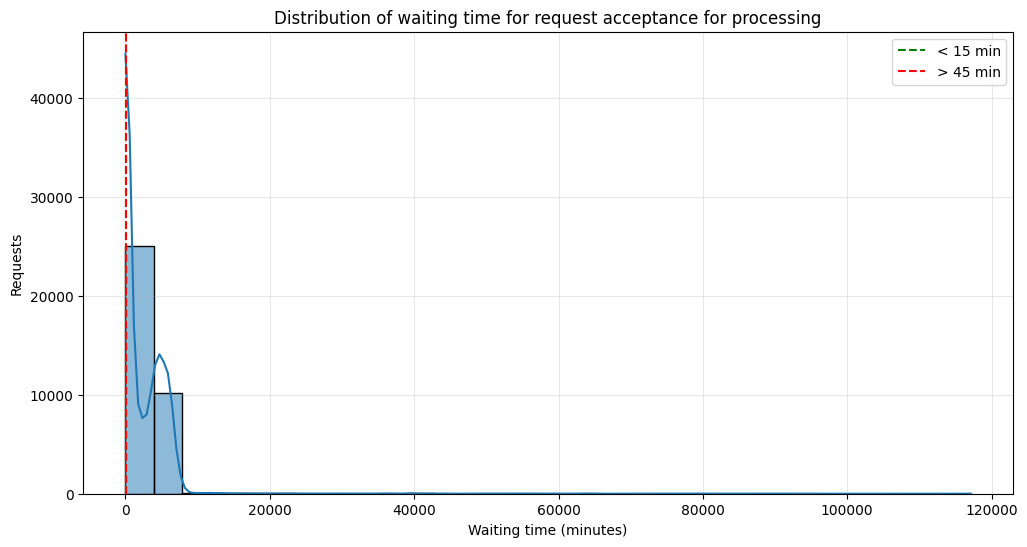

In [40]:
# Візуалізація розподілу часу очікування (від запиту до початку обробки)
plt.figure(figsize=(12,6))

sns.histplot(df["response_time"], bins=30, kde=True)
plt.axvline(15, color="green", linestyle="--", label="< 15 min")
plt.axvline(45, color="red", linestyle="--", label="> 45 min")
plt.title("Distribution of waiting time for request acceptance for processing")
plt.xlabel("Waiting time (minutes)")
plt.ylabel("Requests")

plt.grid(alpha=0.3)
plt.legend()
plt.show()

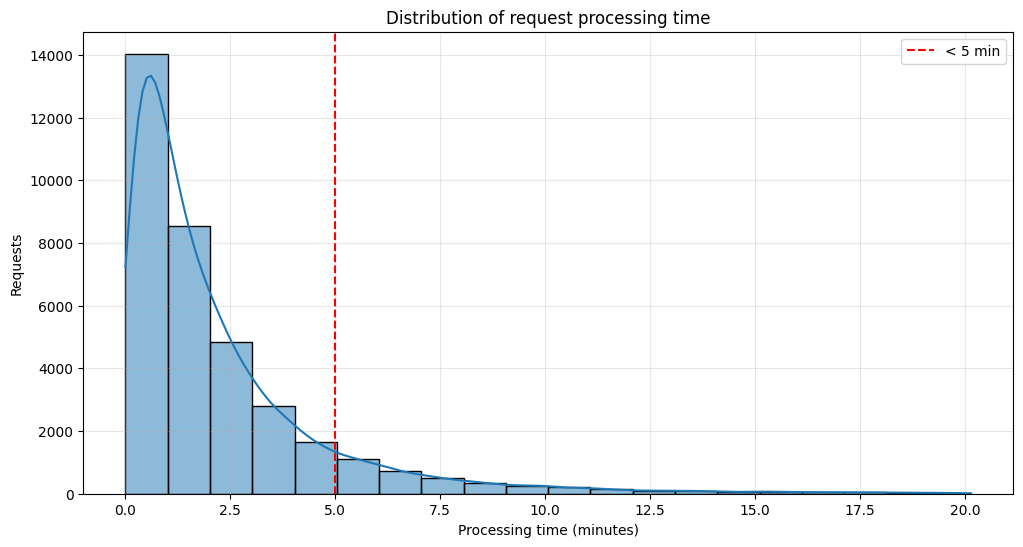

In [39]:
# Візуалізація розподілу часу обробки кейсу
plt.figure(figsize=(12,6))

sns.histplot(df["processing_time"], bins=20, kde=True)
plt.axvline(5, color="red", linestyle="--", label="< 5 min")
plt.title("Distribution of request processing time")
plt.xlabel("Processing time (minutes)")
plt.ylabel("Requests")

plt.grid(alpha=0.3)
plt.legend()
plt.show()

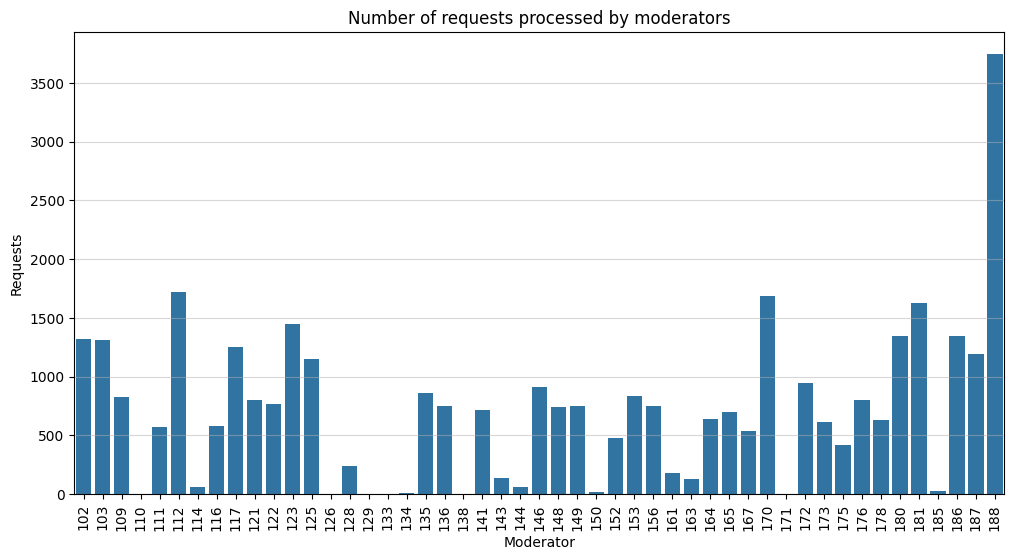

In [41]:
# Візуалізація ефективності роботи агентів
plt.figure(figsize=(12,6))

sns.barplot(x="moderator", y="total_requests", data=moderator_analysis)
plt.xticks(rotation=90)
plt.title("Number of requests processed by moderators")
plt.xlabel("Moderator")
plt.ylabel("Requests")

plt.grid(axis="y", alpha=0.5)
plt.show()

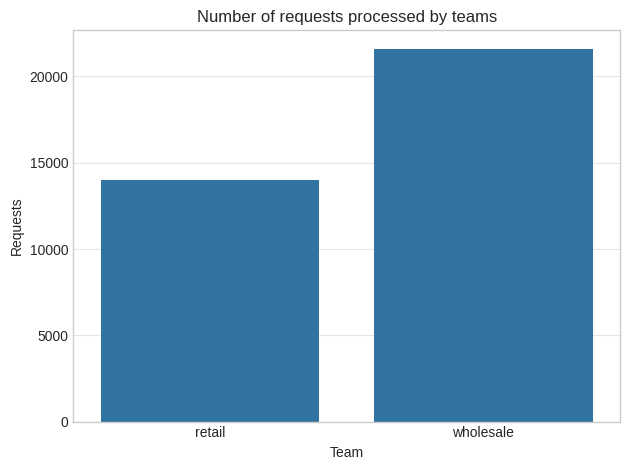

In [90]:
# Візуалізація ефективності роботи команд

sns.barplot(x="team", y="total_requests", data=team_analysis)
plt.title("Number of requests processed by teams")
plt.xlabel("Team")
plt.ylabel("Requests")

plt.grid(axis="y", alpha=0.5)
plt.tight_layout()
plt.show()

In [48]:
# Виділення години запиту
df["request_hour"] = df["request_time"].dt.hour

# Групуємо дані по годині дня і обчислюємо
hourly_analysis = df.groupby("request_hour").agg(
    total_requests = ("id_request", "count"),
    median_response_time = ("response_time", "median")
).reset_index()

print(f"Hourly analysis:\n {hourly_analysis}")

Hourly analysis:
     request_hour  total_requests  median_response_time
0              0             587              1974.150
1              1            1507              3481.420
2              2            1818              3721.445
3              3            1910              3788.875
4              4            1058              3387.810
5              5            1450              3909.035
6              6            2039              2941.220
7              7            2572              1869.360
8              8            3386              2290.245
9              9            2940               439.560
10            10            2015                69.480
11            11            2169                82.970
12            12            1925                63.220
13            13            1994                81.665
14            14            1740                93.560
15            15            1510               100.115
16            16             989               

## **Загальні висновки**

#### *1. Наскільки служба підтримки відповідає очікуванням менеджменту? Як вона працює зараз?*

* Середнє значення очікування відповіді  2468.73 хв — це **перевищує** очікування менеджменту < 15 хв.
* Середнє значення обробки запиту 2.24 хв — **відповідає** очікуванням менеджменту < 5 хв.
* Частка запитів, що чекають довше 45 хв — 78.34%

**В підсумку:**

Агенти працюють швидко, як цього очікує менеджмент, але через низьку кількість агентів накопичилась велика черга запитів, через що клієнти чекають на відповідь годинами або днями.

#### *2. На яких агентів варто звернути увагу задля підвищення якості обслуговування?*

**Агенти по кількості оброблених запитів:**

* Агенти **112, 123, 170, 181, 188** — це лідери за обсягом (1450-3750 запитів)
* Агент **188** виділяється та має найбільший показник (3746 запитів)
* Агенти **110, 126, 129, 133, 138, 171** — мають найнижчі показники (1-2 запити)

**Агенти за продуктивністю:**

* Агенти **126, 134, 138, 171** мають найкращі показники (менше 1 хв), але маленьку кількість заявок.
* Агенти **176, 188** мають гарні показники по часу обробки (1,1 хв) та кількості запитів (803 та 3746)
* Агенти **133, 150** мають низьку продуктивність по часу обробки запитів (більше 5 хв).


**В підсумку:**

Методи роботи агентів з високими показниками мають бути проаналізовані, особливо агентів 176 та 188. Можливо після аналізу треба взяти їх роботу за стандарт. Також слід перевірити завантаження агентів з низькими показниками, їх час роботи та навички.

#### *3. Чи варто збільшити команду підтримки і наскільки?*

Так, треба збільшити команду підтримки. Але перед цим можна спробувати відкоригувати графіки роботи агентів та проаналізувати, як це вплине на показники обробки. Якщо ситуація не покращиться, тоді вже розглядати збільшення кількості агентів.

#### *4. Як варто змінити графік служби підтримки?*

Велика кількість запитів надходить в період 00:00-08:00 та час очікування сягає до декілька днів. По часу відповіді бачимо, що основна частина агентів починають працювати над запитами з 09:00, і до 16:00 кількість запитів стабільно висока. Після 16:00 навантаження по запитам стабілізується, але з 22:00 знову починається негативна динаміка, тому що більшість агентів в цей час вже не працює і час очікування відповідно зростає та накопичується на наступний день.

У звяʼзку з цим треба розглянути можливість введення дежурної нічної зміни, щоб не було великого накопичення запитів за цей час. Треба змінити початок робочого дня основної частини агентів, бо саме в ранковий час висить найбільша кількість запитів. Також треба розподілити графік так, щоб частина агентів працювала і в вечірній час .

**Таким чином, графік роботи агентів для розгляду:**

* Нічна зміна — з 00:00 до 07:00
* Основна денна зміна — з 07:00 до 16:00 (з урахуванням години перерви)
* Вечірня зміна — з 16:00 до 00:00

Це допоможе оптимізувати роботу підтримки та не перевищувати очікування відповіді більше 45 хв.

#### *5. Чи є вигода від об'єднання команд?*

Так, вигода є.

Команда **Wholesale** обробляє значно більше запитів ( > 21000) порівняно з командою **Retail** ( ~ 14000).

Такий дисбаланс у навантаженні створює накопичення запитів, тому що агенти не можуть допомогти. Об'єднання в одну команду дозволить збалансувати навантаження на підтримку в цілому. Агенти з менш завантаженої команди Retail можуть у допомогти агентам команди Wholesale, що знизить середній час очікування клієнтами на відповіді.